In [1]:
include("../ntl.jl")
import Random

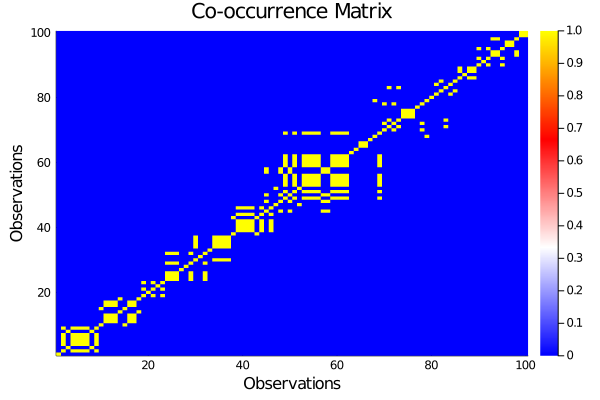

In [6]:
using LinearAlgebra
Random.seed!(1)

data_covariance = Matrix{Float64}(0.1I, 2, 2)
prior_covariance = Matrix{Float64}(I, 2, 2)
prior_mean = Vector{Float64}(zeros(2))
data_parameters = Ntl.Models.GaussianParameters(data_covariance, prior_mean, prior_covariance)

psi_prior = Vector{Float64}([1, 1])
phi_prior = Vector{Float64}([1, 1])
geometric_arrival = Ntl.Models.GeometricArrivals(phi_prior)
cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)

mixture = Ntl.Generate.generate(100, data_parameters, cluster_parameters)
data = Matrix(transpose(mixture[:, 2:end]))
true_clustering = mixture[:, 1]
Ntl.Plot.plot_assignments(true_clustering)
Ntl.Plot.plot_co_occurrence_matrix(true_clustering)

Iteration: 2/100
Iteration: 3/100
Iteration: 4/100
Iteration: 5/100
Iteration: 6/100
Iteration: 7/100
Iteration: 8/100
Iteration: 9/100
Iteration: 10/100
Iteration: 11/100
Iteration: 12/100
Iteration: 13/100
Iteration: 14/100
Iteration: 15/100
Iteration: 16/100
Iteration: 17/100
Iteration: 18/100
Iteration: 19/100
Iteration: 20/100
Iteration: 21/100
Iteration: 22/100
Iteration: 23/100
Iteration: 24/100
Iteration: 25/100
Iteration: 26/100
Iteration: 27/100
Iteration: 28/100
Iteration: 29/100
Iteration: 30/100
Iteration: 31/100
Iteration: 32/100
Iteration: 33/100
Iteration: 34/100
Iteration: 35/100
Iteration: 36/100
Iteration: 37/100
Iteration: 38/100
Iteration: 39/100
Iteration: 40/100
Iteration: 41/100
Iteration: 42/100
Iteration: 43/100
Iteration: 44/100
Iteration: 45/100
Iteration: 46/100
Iteration: 47/100
Iteration: 48/100
Iteration: 49/100
Iteration: 50/100
Iteration: 51/100
Iteration: 52/100
Iteration: 53/100
Iteration: 54/100
Iteration: 55/100
Iteration: 56/100
Iteration: 57/100


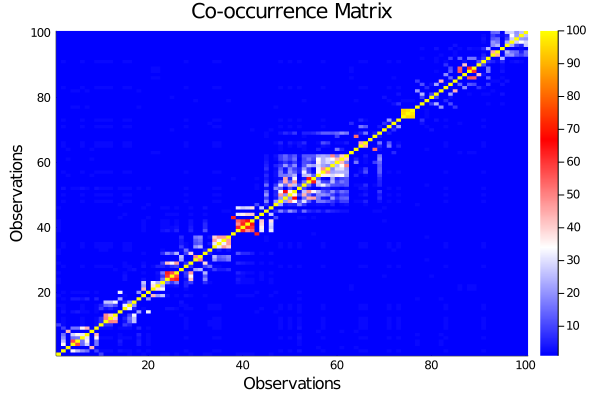

In [7]:
markov_chain = Ntl.Fitter.fit(data, data_parameters, cluster_parameters, 100, method="gibbs")
Ntl.Plot.plot_co_occurrence_matrix(Matrix(markov_chain))